# Ridge Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [3]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

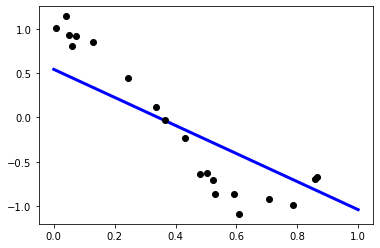

In [4]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


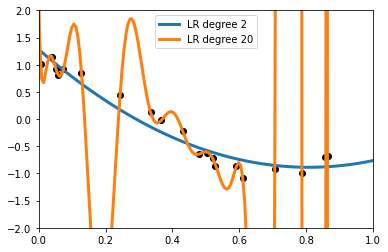

In [5]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001


LR degree 20
R degree 20 alpha 1
R degree 20 alpha 10000
R degree 20 alpha 0.0001


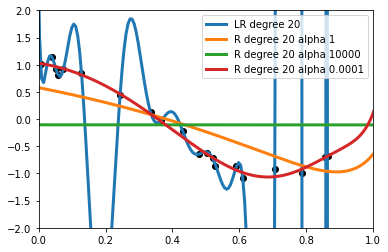

In [6]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

models.append(('R degree 20 alpha 1', make_pipeline(PolynomialFeatures(20), Ridge(alpha=1)) ))
models.append(('R degree 20 alpha 10000', make_pipeline(PolynomialFeatures(20), Ridge(alpha=10000)) ))
models.append(('R degree 20 alpha 0.0001', make_pipeline(PolynomialFeatures(20), Ridge(alpha=0.0001)) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha za pomocą komendy **GridSearchCV**. 

In [8]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                               'ridge__alpha': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]},
                    cv=5,
                    refit=False)

grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 6, 'ridge__alpha': 0.0001}

{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.001}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [10]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=4), Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                               'ridge__alpha': [0.0001, 0.01, 1, 10, 100, 1000]},
                    cv=5,
                    refit=True)

grid.fit(X, y)
print(grid.best_params_)
print("R^2: {}".format(metrics.r2_score(y, grid.predict(X))))

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01834e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.23833e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00669e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.47512e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridg

/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65915e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55387e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49427e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71544e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridg

{'polynomialfeatures__degree': 4, 'ridge__alpha': 100}
R^2: 0.9947082029024246


/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83864e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32726e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/jakubstepien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01663e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
